In [1]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getcwd()

'C:\\Users\\steve'

In [3]:
os.chdir(r"E:\Work\04-Study\00-IT Ref\DataResources")

In [4]:
df = pd.read_csv("train.csv", index_col="Loan_ID")

In [6]:
df.loc[(df["Gender"]=="Female") & (df["Education"]=="Not Graduate") & (df["Loan_Status"]=="Y"), 
["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


In [8]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print ("\nMissing values per row:")
print (df.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values per row:
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


In [11]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
#Determine pivot table
impute_grps = df.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
print( impute_grps)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             110.596774
               Yes            125.800000
       Yes     No             135.480000
               Yes            282.250000
Male   No      No             128.137255
               Yes            173.625000
       Yes     No             151.709220
               Yes            169.355556


In [18]:
pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [19]:
def percConvert(ser):
    return ser/float(ser[-1])
pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True).apply(percConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


In [20]:
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


In [21]:
data_merged = df.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)

Property_Area  rates
Rural          1000     179.0
Semiurban      5000     233.0
Urban          12000    202.0
Name: Credit_History, dtype: float64

In [22]:
data_sorted = df.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0.0
LP002101,63337,0.0
LP001585,51763,0.0
LP001536,39999,0.0
LP001640,39147,4750.0
LP002422,37719,0.0
LP001637,33846,0.0
LP001448,23803,0.0
LP002624,20833,6667.0


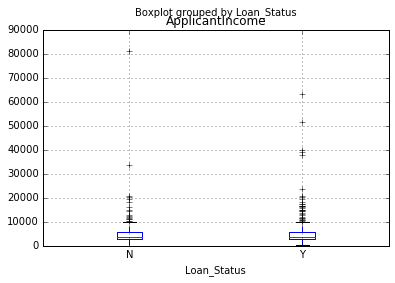

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
df.boxplot(column="ApplicantIncome",by="Loan_Status")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x06A61FF0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x06C02310>], dtype=object)

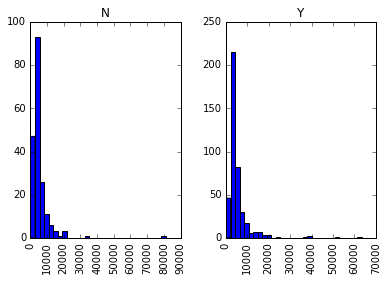

In [24]:
df.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

In [26]:
#Binning:
def binning(col, cut_points, labels=None):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()

    #create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]

    #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)

    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
df["LoanAmount_Bin"] = binning(df["LoanAmount"], cut_points, labels)
print (pd.value_counts(df["LoanAmount_Bin"], sort=False))

low          104
medium       266
high         135
very high     91
Name: LoanAmount_Bin, dtype: int64


In [28]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded
 
#Coding LoanStatus as Y=1, N=0:
print ('Before Coding:')
print (pd.value_counts(df["Loan_Status"]))
df["Loan_Status_Coded"] = coding(df["Loan_Status"], {'N':0,'Y':1})
print ('\nAfter Coding:')
print (pd.value_counts(df["Loan_Status_Coded"]))

Before Coding:
Y    422
N    192
Name: Loan_Status, dtype: int64

After Coding:
1    422
0    192
Name: Loan_Status_Coded, dtype: int64


In [30]:
#Check current type:
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object

In [33]:
#Load the file:
colTypes = pd.read_csv('datatypes.csv')
print (colTypes)

              feature         type
0              Gender  categorical
1             Married  categorical
2          Dependents  categorical
3           Education  categorical
4       Self_Employed  categorical
5     ApplicantIncome   continuous
6   CoapplicantIncome   continuous
7          LoanAmount   continuous
8    Loan_Amount_Term   continuous
9      Credit_History  categorical
10      Property_Area  categorical
11        Loan_Status  categorical


In [34]:
#Iterate through each row and assign variable type.
#Note: astype is used to assign types

for i, row in colTypes.iterrows():  #i: dataframe index; row: each row in series format
    if row['type']=="categorical":
        df[row['feature']] = df[row['feature']].astype(np.object)
    elif row['type']=="continuous":
        df[row['feature']] = df[row['feature']].astype(np.float)
print( df.dtypes)

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History         object
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object


In [36]:
df.describe()

d:\program files\python\python35-32\lib\site-packages\numpy\lib\function_base.py:3835: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status_Coded
count,614.000000,614.000000,596.000000,600.00000,614.000000
mean,5403.459283,1621.245798,146.437771,342.00000,0.687296
std,6109.041673,2926.248369,85.308176,65.12041,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,0.000000
50%,3812.500000,1188.500000,NaN,NaN,1.000000
75%,5795.000000,2297.250000,NaN,NaN,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000
